In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
heart_df = pd.concat([pd.read_csv('heart_train.csv'),
                      pd.read_csv('heart_test.csv')]).reset_index().drop('index', axis=1)

In [3]:
dataset_size = heart_df.shape
print('There are  = {0} rows and {1} columns'.format(dataset_size[0], dataset_size[1]))
heart_df.head()

There are  = 303 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [30]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [92]:
numeric_columns = ['age', 'oldpeak', 'chol', 'thalach', 'trestbps']
categorical_columns = ['cp', 'ca', 'thal', 'slope', 'restecg']
bool_columns = ['sex', 'exang', 'fbs']
print('Categorical - {0}, Numerical - {1}, Boolean - {2}'.format(numeric_columns, categorical_columns, bool_columns))

Categorical - ['age', 'oldpeak', 'chol', 'thalach', 'trestbps'], Numerical - ['cp', 'ca', 'thal', 'slope', 'restecg'], Boolean - ['sex', 'exang', 'fbs']


In [63]:
def get_numerical_distribution(variable):
    g = sns.FacetGrid(heart_df, col="target", height=7)
    g = g.map(sns.distplot, variable)

In [71]:
def get_categorical_distribution(variable):
    g = sns.FacetGrid(heart_df, col="target", height=7)
    g = g.map(sns.countplot, variable)

### Numerical columns

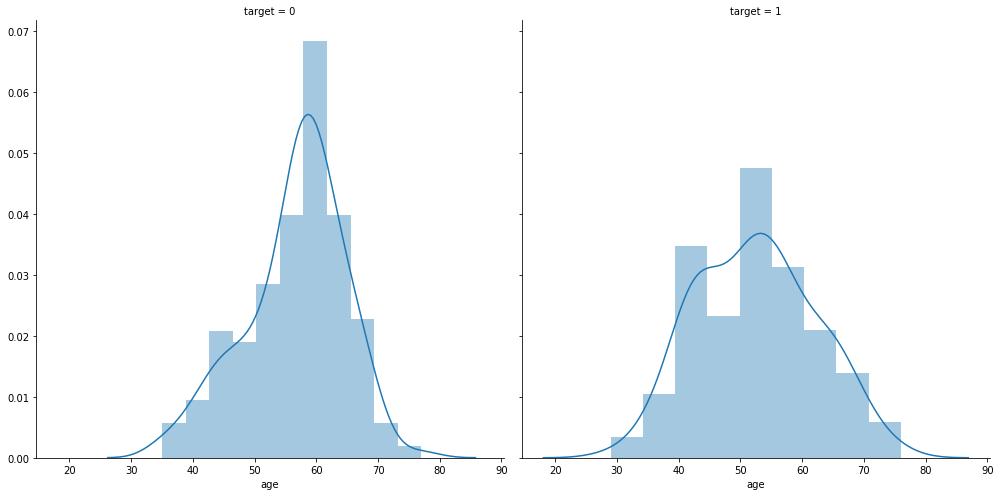

In [64]:
get_numerical_distribution('age')

As we can see, distributon for target = 0 has a heavier left tail. Besides, we've seen once again that this attribute needs to be standardized.

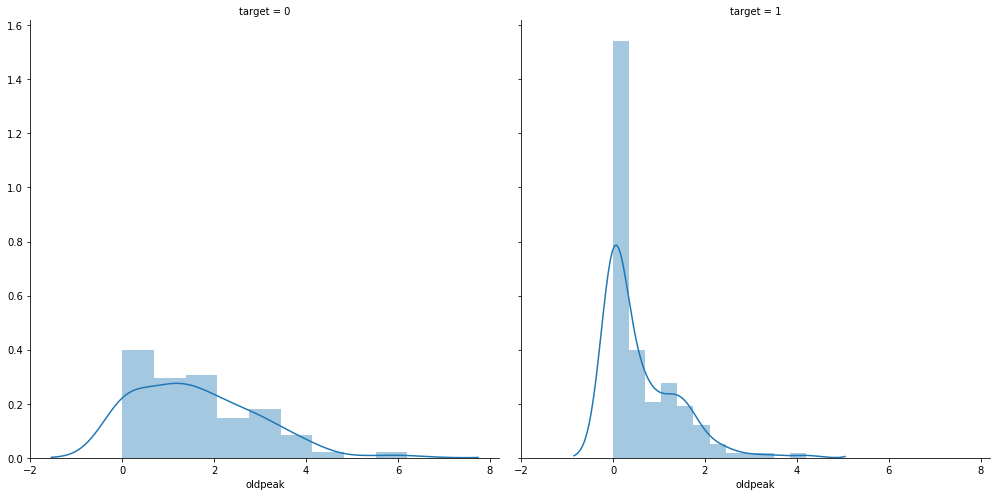

In [65]:
get_numerical_distribution('oldpeak')

It's a good idea to swap this feature(x) with the new one log(x). As we know, log is a good idea when we have right tail

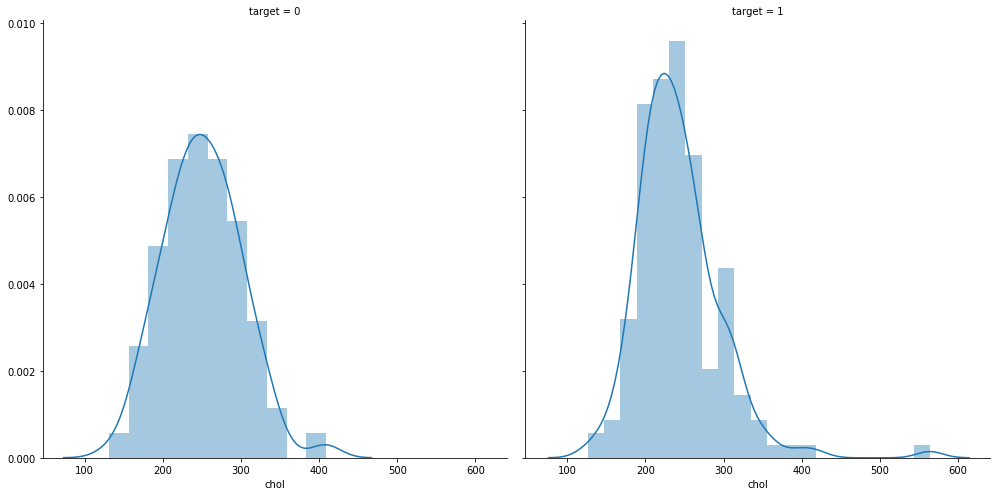

In [66]:
get_numerical_distribution('chol')

This feature is more similar to normal distribution but also has a heavy right tail

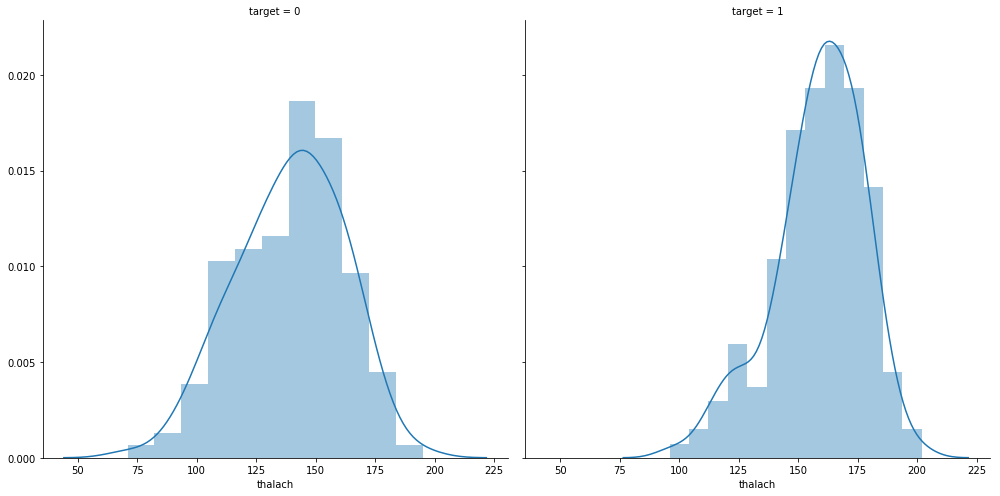

In [67]:
get_numerical_distribution('thalach')

The same with this one, but the heavy tail is now on the left

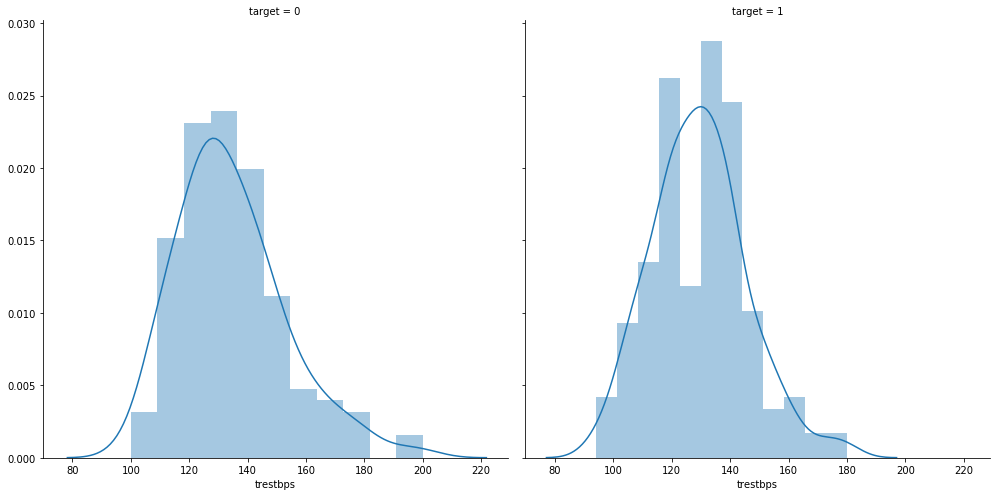

In [70]:
get_numerical_distribution('trestbps')

The same as feature 'chol'.

### Categorical columns

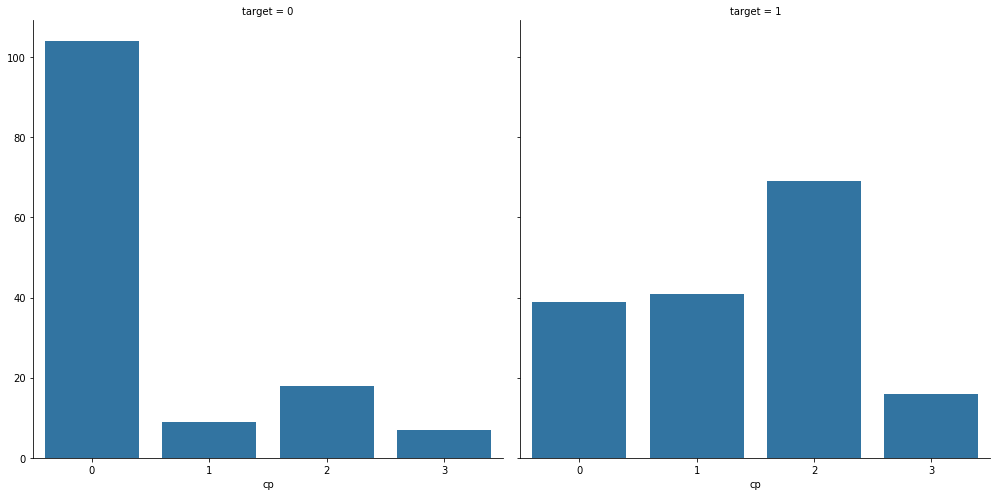

In [73]:
get_categorical_distribution('cp')

It's getting interesting, because a feature with a value of 2 is more common in a disease.

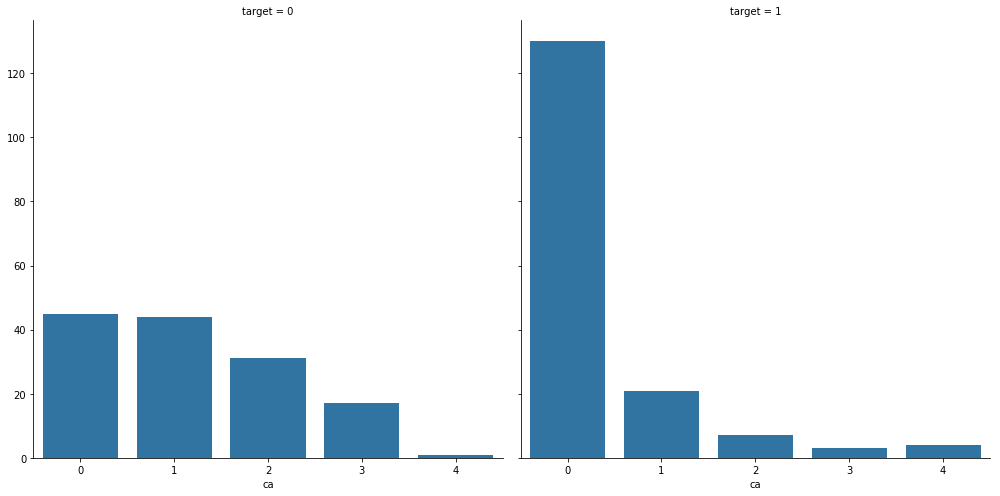

In [74]:
get_categorical_distribution('ca')

The feature with a value of 1 is more common in a disease.

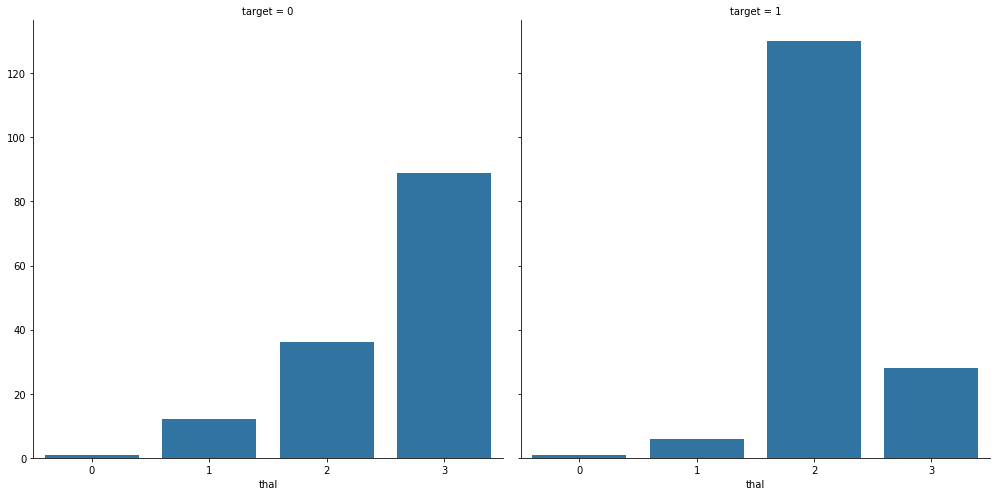

In [76]:
get_categorical_distribution('thal')

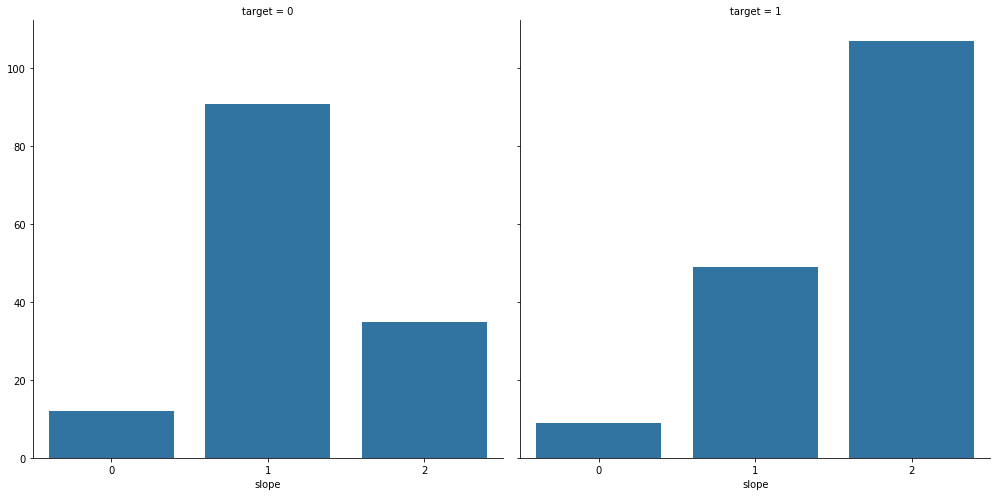

In [77]:
get_categorical_distribution('slope')

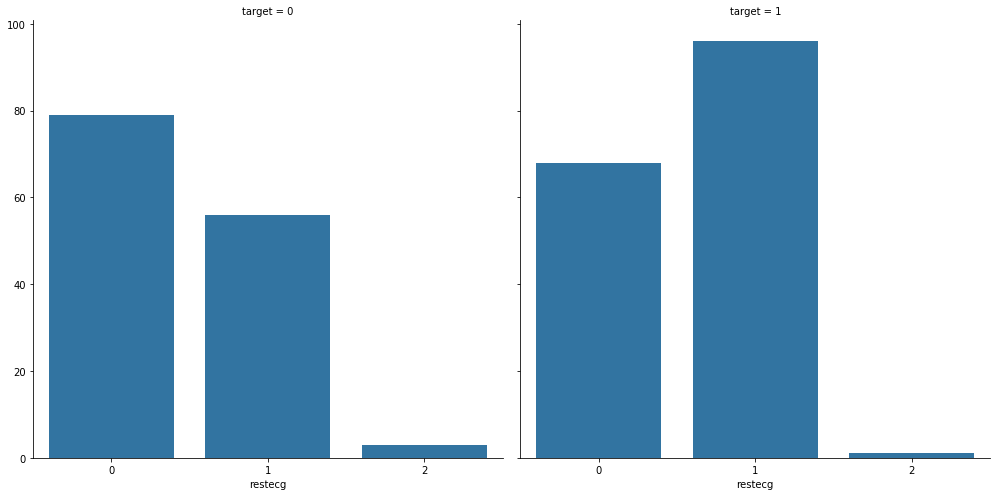

In [78]:
get_categorical_distribution('restecg')

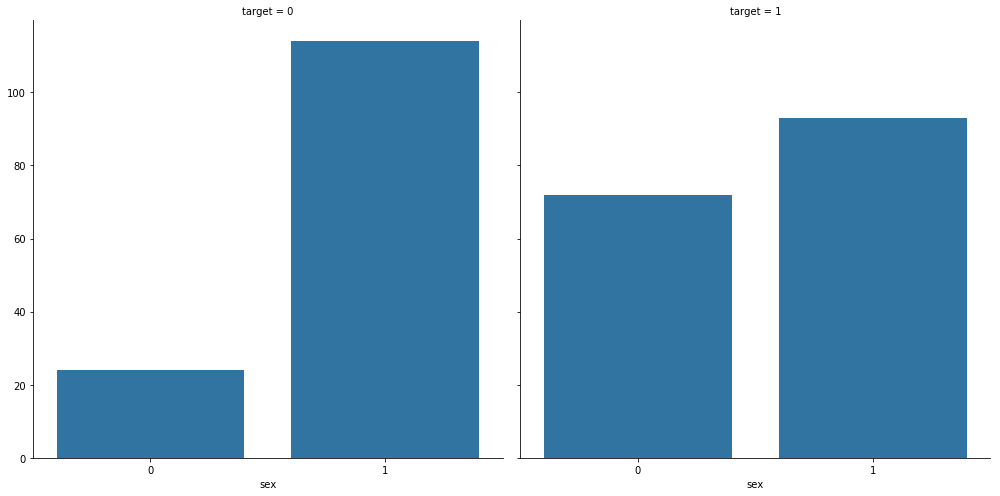

In [79]:
get_categorical_distribution('sex')

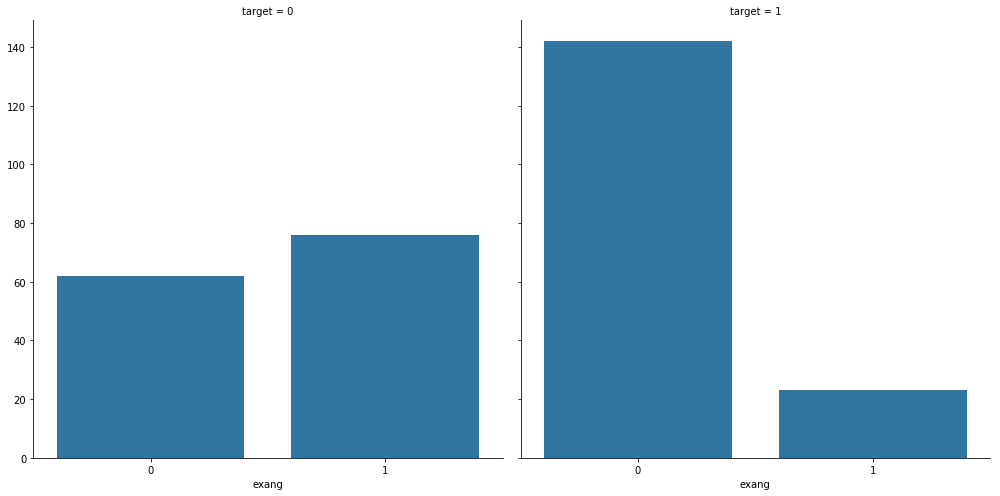

In [80]:
get_categorical_distribution('exang')

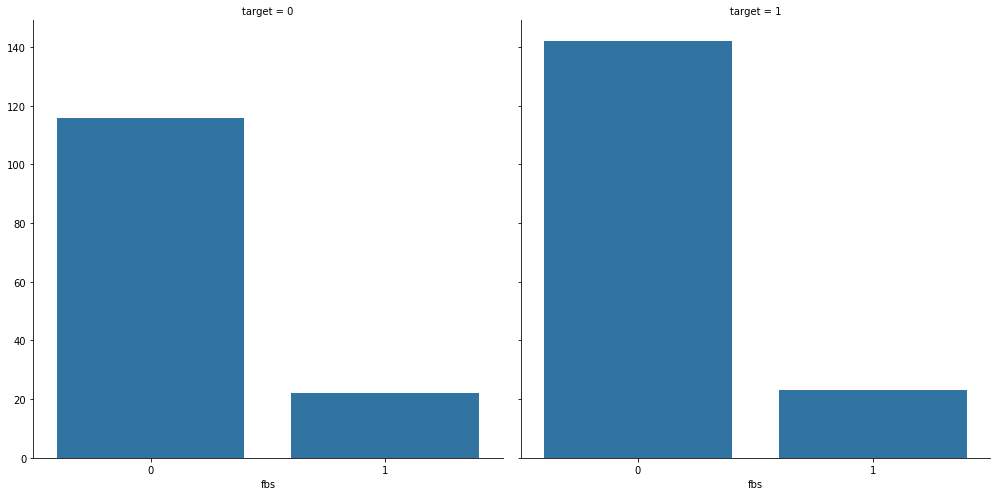

In [81]:
get_categorical_distribution('fbs')

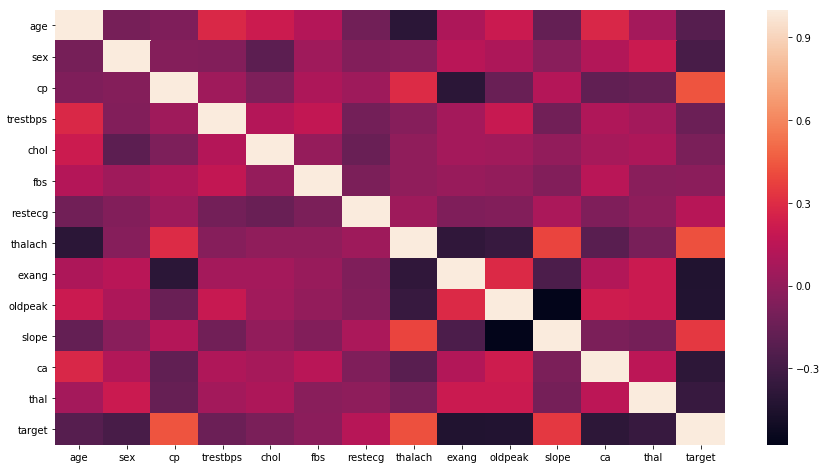

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(heart_df.corr());

There is no strong linear correlation between the different features. It's good for our linear model

In [86]:
X, y = heart_df.drop('target', axis=1), heart_df['target'].values

In [87]:
one_hot = OneHotEncoder(sparse=False)
X_categorical = one_hot.fit_transform(X[categorical_columns + bool_columns])
X_full = np.hstack((X_categorical, X[numeric_columns].values))

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

Of course, if I was gonna train a model, I'd split the dataset into two different(train, test).

In [96]:
heart_df.profile_report()

### Conclusion

It's seems all features are good especially 'thal', 'ca' and 'cp'. As i wrote we need to do some trasformation with numerical features.
Propably it's a good idea, to create a new binary feature age:low, middle, high.